In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The GSI's Defense ##

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.where("Midterm",are.equal_to(25) )

Section,Midterm
3,25
7,25
7,25
1,25
11,25
12,25
1,25
7,25
9,25
11,25


In [4]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [5]:
scores.group('Section', np.mean).show()

Section,Midterm mean
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [45]:
observed_average = 13.6667 

In [22]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
9,0
6,17
4,10
9,11
1,14
11,18
3,17
2,17
1,8
6,11


In [23]:
np.average(random_sample.column('Midterm'))

15.851851851851851

In [5]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [6]:
random_sample_midterm_avg()

14.592592592592593

In [41]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

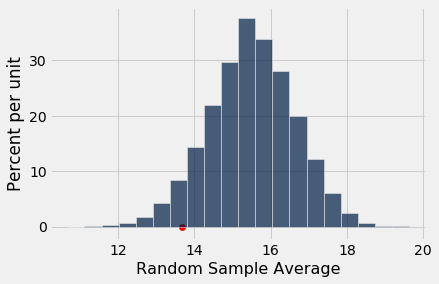

In [46]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [47]:
sum(sample_averages <= observed_average) / 50000

0.0578

In [48]:
# 5% of 50,000 = 2500

five_percent_point = averages_tbl.sort(0).column(0).item(2)
five_percent_point

13.592592592592593

In [82]:
averages_tbl.sort(0).column(0).item(2499)

13.592592592592593

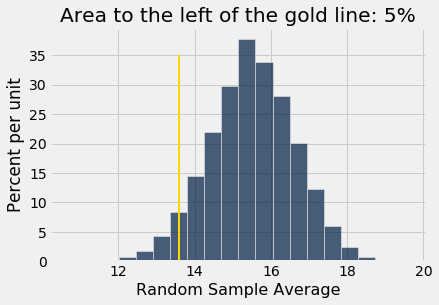

In [49]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');